# **Praktikum II & III Machine Learning dan Modern Prediction**

'''
=================================================
Nama  : Risfa Fadila

NPM : F1F022015

REGRESSION TREE DAN K-NEAREST NEIGHBORS
=================================================
'''

# Latar Belakang

Kemampuan untuk memprediksi permintaan dan penjualan di masa depan merupakan faktor kunci yang menentukan keberhasilan strategi bisnis di berbagai sektor, termasuk industri otomotif. Prediksi yang akurat memungkinkan perusahaan, seperti produsen mobil, untuk mengoptimalkan manajemen inventori, perencanaan produksi, hingga merumuskan kebijakan harga yang kompetitif (Longani, J., et al., 2025). Seiring dengan masifnya data yang tersedia, teknologi machine learning (ML) telah menjadi metode andalan dalam analisis prediktif karena kemampuannya menangkap pola kompleks dan non-linear yang sulit diidentifikasi oleh model statistik tradisional.

Dalam kerangka machine learning untuk regresi, dua metode yang paling sering dikomparasi adalah Regression Tree (RT) dan K-Nearest Neighbors (KNN).Regression Tree berakar dari kerangka CART (Classification and Regression Tree) yang dipublikasikan oleh  Breiman, L., et al., (1984). Metode ini menggunakan pendekatan non-parametrik dengan mempartisi data secara rekursif, yang menghasilkan model yang sangat mudah diinterpretasikan (interpretable) serta efektif dalam memetakan hubungan antar variabel yang kompleks.
K-Nearest Neighbors (KNN), yang konsep dasarnya diperkenalkan oleh Cover, T., & Hart, P. (1967), merupakan algoritma berbasis instansi yang sederhana. KNN melakukan prediksi nilai baru dengan mengambil rata-rata nilai dari $k$ 'tetangga' terdekat dalam ruang fitur. Meskipun sederhana dan fleksibel, performa KNN sangat bergantung pada pemilihan nilai $k$ yang optimal dan perlunya normalisasi data.

Dalam konteks prediksi penjualan otomotif, studi-studi terdahulu menunjukkan bahwa Regression Tree sering kali unggul dalam kejelasan model dan identifikasi faktor-faktor kunci penentu penjualan, sementara KNN menonjol dalam akurasi pada dataset yang memiliki pola lokal yang kuat. Penggunaan data penjualan merek tertentu, misalnya data penjualan BMW, memberikan peluang praktis untuk menguji efektivitas kedua algoritma regresi tersebut secara langsung.
Oleh karena itu, praktikum ini bertujuan untuk melakukan perbandingan komprehensif terhadap performa prediktif metode Regression Tree dan K-Nearest Neighbors pada data penjualan otomotif. Hasil perbandingan ini diharapkan dapat memberikan pemahaman yang jelas mengenai trade-off antara interpretasi model (RT) dan akurasi (KNN) dalam konteks prediksi penjualan, serta menentukan algoritma mana yang paling sesuai untuk data spesifik yang digunakan.

# Rumusan Masalah

Adapun rumusan masalah penelitian kali ini yaitu:
1. Apa konsep dasar algoritma Decision Tree?
2. Bagaimana cara membedakan antara Classification Tree dan Regression Tree?
3. Bagaimana cara menerapkan Decision Tree untuk klasifikasi?
4. Bagaimana cara melakukan evaluasi model Decision Tree menggunakan confusion matrix dan accuracy score?
5. Bagaimana interpretasikan hasil model dalam bentuk visualisasi pohon keputusan?
7. Apa konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi?
8. Bagaimana cara mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python?
9. Bagaimana cara mengevaluasi performa model KNN menggunakan accuracy score dan confusion matrix?

# Tujuan Penelitian

Adapun tujuan penelitian kali ini yaitu:
Adapun rumusan masalah penelitian kali ini yaitu:
1. Menjelaskan konsep dasar algoritma Decision Tree.
2. Membedakan antara Classification Tree dan Regression Tree.
3. Menerapkan Decision Tree untuk klasifikasi.
4. Melakukan evaluasi model Decision Tree menggunakan confusion matrix dan
accuracy score.
5. Menginterpretasikan hasil model dalam bentuk visualisasi pohon keputusan.
6. Memahami konsep dasar algoritma K-Nearest Neighbors (KNN) untuk
klasifikasi.
7. Mengimplementasikan KNN menggunakan pustaka Scikit-learn di Python.
8. Mengevaluasi performa model KNN menggunakan accuracy score dan
confusion matrix

# Mengimpor _Libraries_

Berikut merupakan _library_ yang akan digunakan dalam _notebook_ ini:

In [1]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.0/230.0 kB 4.8 MB/s eta 0:00:00


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,  OrdinalEncoder, LabelEncoder,  StandardScaler, RobustScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, confusion_matrix, classification_report, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Memuat Data

Pada Analisis regression tree dan KNN kali ini, dataset yang digunakan adalah "BMW sales data (2010-2024)". Data yang digunakan pada penelitian ini merupakan data skunder yang diberikan oleh Asisten Praktikum pada link berikut https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv .

In [3]:
# Load penelitian Dataset

bmw_df = pd.read_csv(' https://raw.githubusercontent.com/Royallist/DATA-MACHINE-LEARNING/refs/heads/main/BMW%20sales%20data%20(2010-2024).csv', sep=';')
bmw_df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080
...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486


In [4]:
#melihat tipe data
bmw_df.dtypes

,0
Model,object
Year,int64
Region,object
Color,object
Fuel_Type,object
Transmission,object
Engine_Size_L,float64
Mileage_KM,int64
Price_USD,int64
Sales_Volume,int64


In [5]:
# Check Missing Values
bmw_df.isnull().sum()

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


# Analisis Data Eksploratif

Sebelum dilakukan analisis data lebih lanjut, terlebih dahulu dilakukan ekplorasi data. Beikut ditampilkan hasil statistik deskriptif dari data iklim yang digunakan pada penelitian ini.

In [6]:
print(bmw_df.describe())

               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
mean    2017.015700       3.247180  100307.203140   75034.600900   5067.514680
std        4.324459       1.009078   57941.509344   25998.248882   2856.767125
min     2010.000000       1.500000       3.000000   30000.000000    100.000000
25%     2013.000000       2.400000   50178.000000   52434.750000   2588.000000
50%     2017.000000       3.200000  100388.500000   75011.500000   5087.000000
75%     2021.000000       4.100000  150630.250000   97628.250000   7537.250000
max     2024.000000       5.000000  199996.000000  119998.000000   9999.000000


## Distribusi Sales_Volume

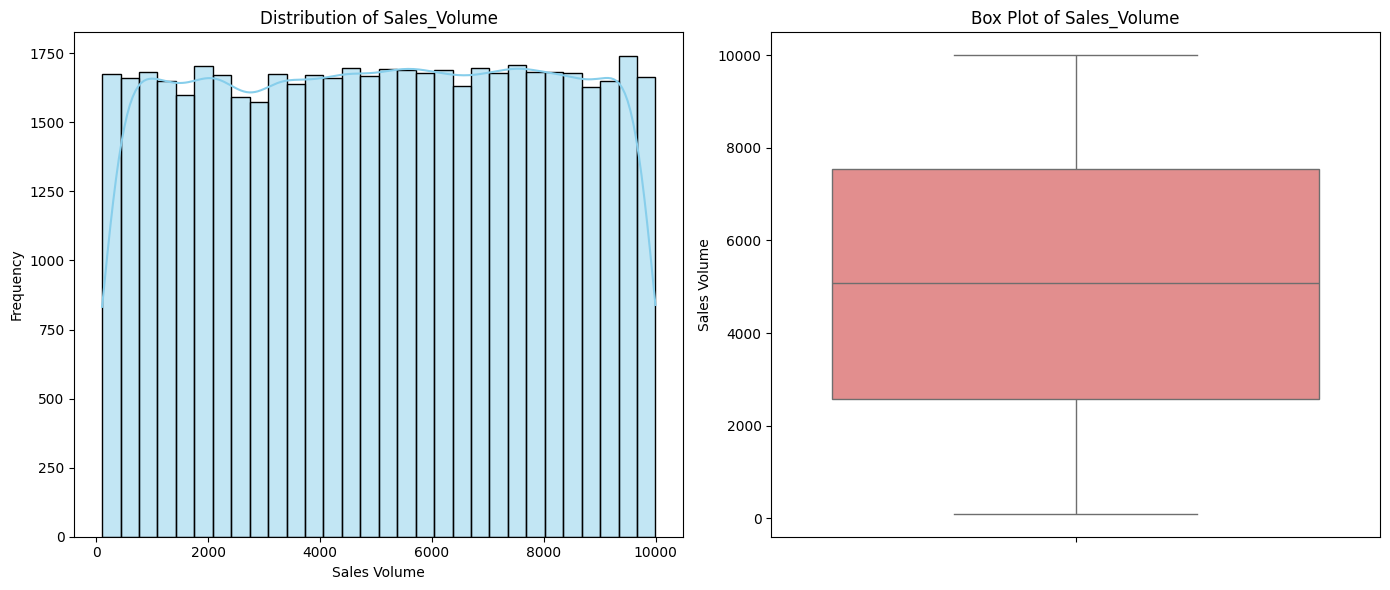

In [7]:
# Set up the figure and axes for subplots
plt.figure(figsize=(14, 6))

# Histogram for Sales_Volume
plt.subplot(1, 2, 1)
sns.histplot(bmw_df['Sales_Volume'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sales_Volume')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')

# Box plot for Sales_Volume
plt.subplot(1, 2, 2)
sns.boxplot(y=bmw_df['Sales_Volume'], color='lightcoral')
plt.title('Box Plot of Sales_Volume')
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()

Visualisasi menggunakan histogram dan box plot menunjukkan bahwa `Sales_Volume` memiliki distribusi yang cenderung seragam, dengan nilai penjualan tersebar cukup merata antara batas minimum dan maksimum. Ini mengindikasikan tidak adanya konsentrasi penjualan yang ekstrem pada nilai-nilai tertentu, serta relatif sedikit outlier yang signifikan.

### Sales Volume vs Variabel lainnya
Perbandingan Distribusi Variabel Sales Volume dengan Variabel numerik lainnya (Year, Engine Size L, Mileage KM, dan Price_USD)

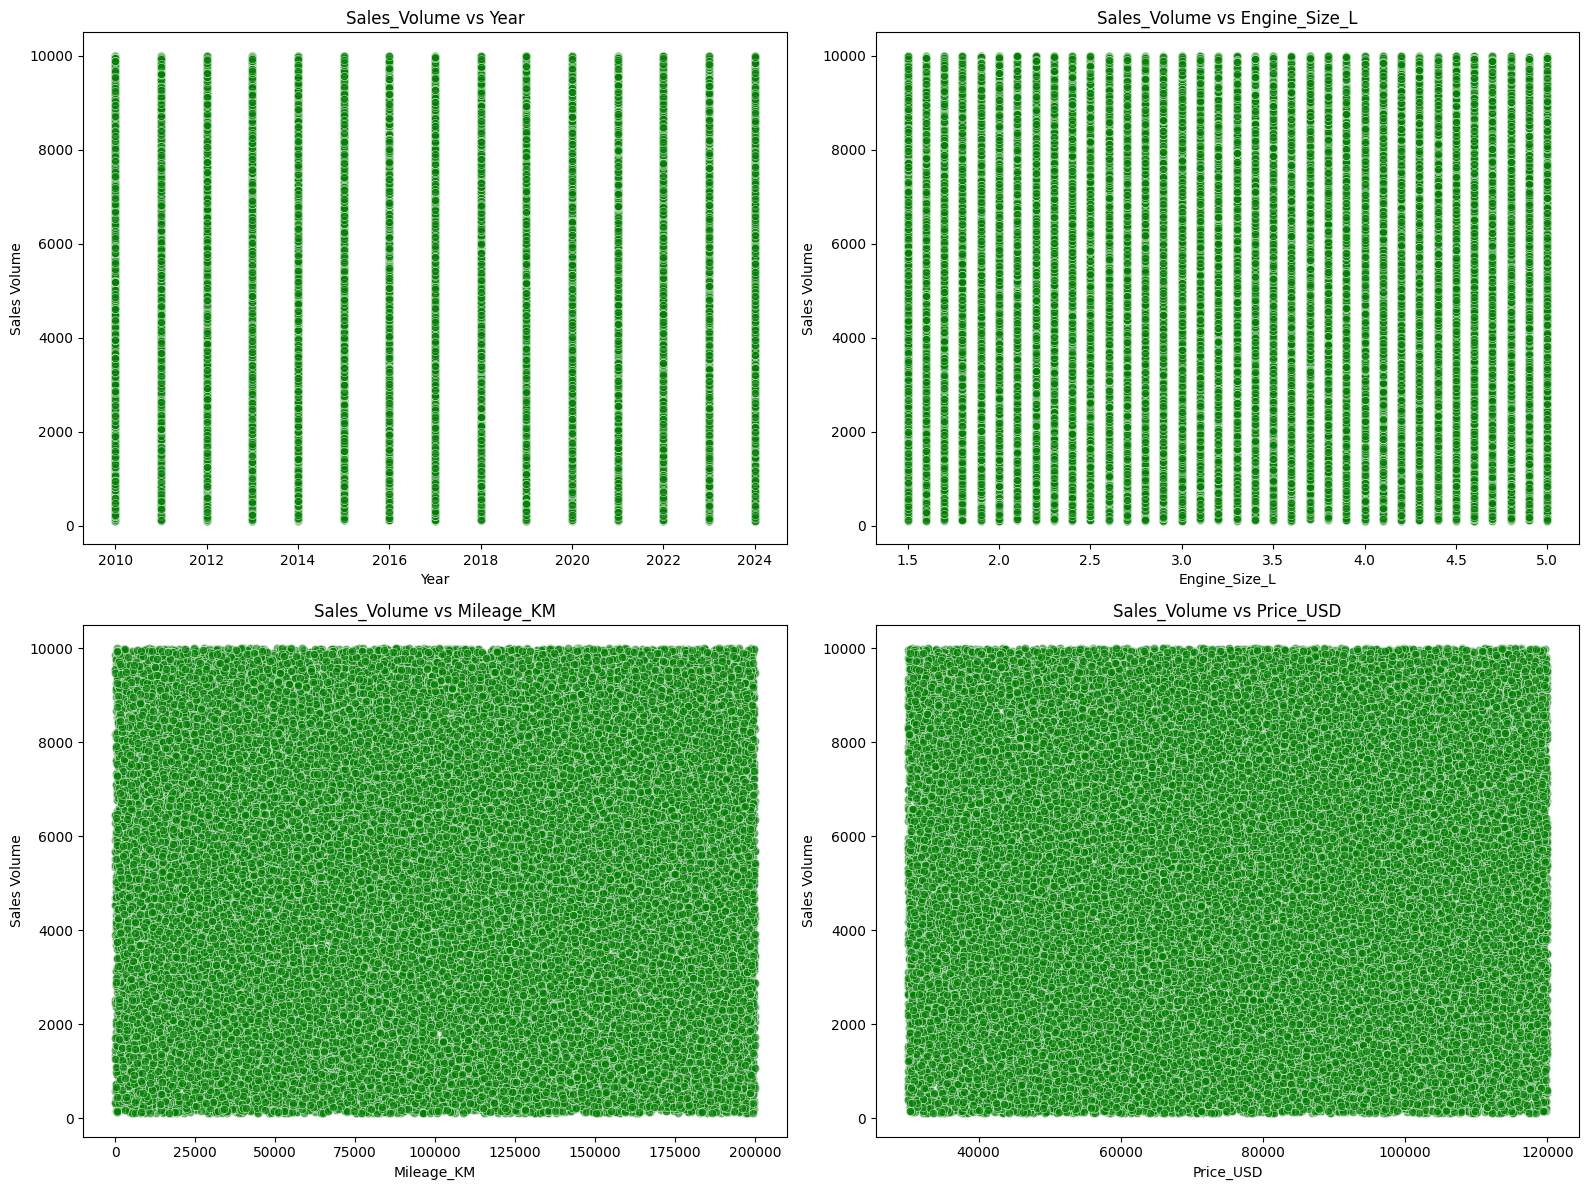

In [8]:
numerical_features = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=bmw_df[feature], y=bmw_df['Sales_Volume'], color='green', alpha=0.6)
    plt.title(f'Sales_Volume vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales Volume')
plt.tight_layout()
plt.show()

Analisis data eksploratif (EDA) terhadap dataset penjualan BMW mengungkapkan beberapa wawasan penting:

*   **Distribusi 'Sales_Volume'**: Visualisasi menggunakan histogram dan box plot menunjukkan bahwa 'Sales_Volume' memiliki distribusi yang cenderung seragam, dengan nilai penjualan tersebar cukup merata antara batas minimum dan maksimum. Ini mengindikasikan tidak adanya konsentrasi penjualan yang ekstrem pada nilai-nilai tertentu, serta relatif sedikit outlier yang signifikan.

*   **Hubungan dengan Fitur Numerik**: Scatter plot antara 'Sales_Volume' dengan 'Year', 'Engine_Size_L', 'Mileage_KM', dan 'Price_USD' menunjukkan bahwa tidak ada korelasi linear yang kuat antara 'Sales_Volume' dengan fitur-fitur numerik ini. Matriks korelasi mengkonfirmasi bahwa koefisien korelasi Pearson antara 'Sales_Volume' dan fitur numerik lainnya sangat mendekati nol, menunjukkan bahwa hubungan linear langsung antar variabel ini lemah atau tidak ada.

### Korelasi Antara Variabel

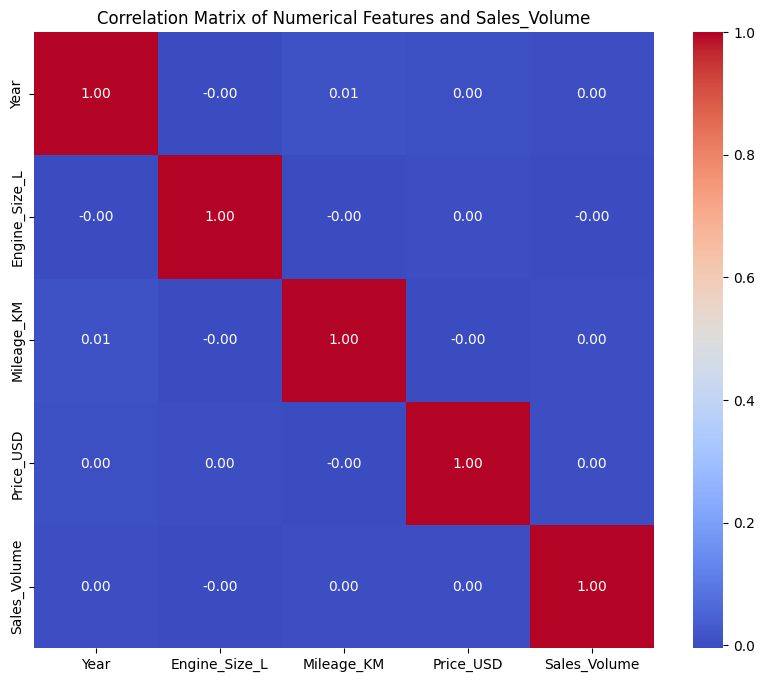

In [9]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
correlation_matrix = bmw_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features and Sales_Volume')
plt.show()

Berdasarkan heatmap didapatkan bahwa tidak korelasi antara variabel pada dataset, hal ini mengindikasikan bahwa model KNN dan Decision Tree akan menampilkan hasil yang tidak baik.

# _Feature Engineering_

## A- Splitting Data

Sebelum dilakukan analis langkah yang perlu dilakukan terlebih dahulu yaitu splitting atau membagi data. Untuk menilai seberapa baik sebuah model akan menggeneralisasi ke data baru, data yang tersedia dibagi menjadi data latih (yang digunakan untuk membangun model) dan data uji (yang digunakan untuk mengevaluasi kinerjanya) (Müller & Guido, 2017).

Dari dataset yang digunakan didefinisikan variabel prediktor (X) dan respon (Y), dimana Hujan sebagai variabel respon dan variabel lainnya sebagai varaibel predktor yang diduga mempengaruhi hujan.

In [10]:
#mendeskripsikan variabel X dan y
X = bmw_df.drop('Sales_Volume', axis = 1)
y = bmw_df['Sales_Volume']

In [11]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=200)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)


Train size :  (37500, 9)
Test size  :  (12500, 9)


Data tersebut baik variabel X dan Variabel Y dipisah menjadi data training dan data testing dengan perbandingan 75% Training : 25% Testing. Diperoleh X_train dan Y_train untuk data training serta X_test dan y_test untuk data testing.

## B- Scaling

Tahapan selanjutnya yaitu dilakukan scalling, yang bertujuan untuk menyamakan rentang nilai (skala) dari fitur-fitur numerik yang berbeda. Scaling didefinisikan sebagai proses transformasi matematis pada data numerik untuk menempatkannya dalam skala yang umum, biasanya dalam rentang [0, 1] untuk Normalization (Min-Max Scaling) atau dengan rata-rata 0 dan standar deviasi 1 untuk Standardization (Z-score Scaling), guna mempercepat konvergensi algoritma dan meningkatkan performa model secara keseluruhan (Ahsan, et al., 2021)

In [12]:
# Identify numerical features directly from X_train
numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()

# Initialize lists to store feature names based on skewness
nilai_skew = []
nilai_skew_normal = []

# Calculate skewness for each numerical feature in X_train
print("Calculating skewness for numerical features in X_train:")
for feature in numerical_features:
    skewness = X_train[feature].skew()
    print(f"  {feature}: {skewness:.4f}")
    if -0.5 <= skewness <= 0.5:
        nilai_skew_normal.append(feature)
    else:
        nilai_skew.append(feature)

# Display the categorized features
print('\nKolom yang mempunyai nilai skewness sedang (skewed):', nilai_skew)
print('Kolom yang mempunyai nilai skewness normal:', nilai_skew_normal)

Calculating skewness for numerical features in X_train:
  Year: -0.0108
  Engine_Size_L: -0.0075
  Mileage_KM: -0.0079
  Price_USD: 0.0075

Kolom yang mempunyai nilai skewness sedang (skewed): []
Kolom yang mempunyai nilai skewness normal: ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']


In [13]:
numerical_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']
scaler = StandardScaler()

# Apply fit_transform to X_train for numerical columns
X_train_scaled = X_train.copy() # Create a copy to avoid modifying original X_train directly if not intended
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Apply transform to X_test for numerical columns
X_test_scaled = X_test.copy() # Create a copy to avoid modifying original X_test directly if not intended
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features in X_train and X_test have been scaled using StandardScaler.")
print("X_train_scaled head:\n", X_train_scaled[numerical_cols].head())
print("X_test_scaled head:\n", X_test_scaled[numerical_cols].head())

Numerical features in X_train and X_test have been scaled using StandardScaler.
X_train_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
28475 -0.473404       0.545830    1.243500  -1.039395
10801 -1.166587       0.545830    1.507087  -0.504411
10124 -1.397648      -0.246990   -1.310046   0.076110
4822  -1.166587      -0.346092    1.436374   1.015719
21632 -0.473404      -0.841605    0.712481   0.823966
X_test_scaled head:
            Year  Engine_Size_L  Mileage_KM  Price_USD
20518  0.681901       0.744035   -1.218395  -1.583478
20570 -0.704465       1.437753   -1.325379   0.458581
38530  1.375084      -0.048785   -1.577341   0.601264
39945 -0.242343       0.644933    0.781107  -0.668212
1713  -0.242343      -0.643400   -1.340367  -1.698745


Menggunakan standar scaler untuk dataset yang digunakan memiliki skala yang seragam dengan rataan mendekati 0 dan standar deviasi mendekati 1.

# _Training Model_

In [14]:
# Initialize and train the DecisionTreeRegressor model
reg_tree_model = DecisionTreeRegressor(random_state=42)
reg_tree_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
# Initialize and train the KNeighborsRegressor model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']], y_train)

KNeighborsRegressor()

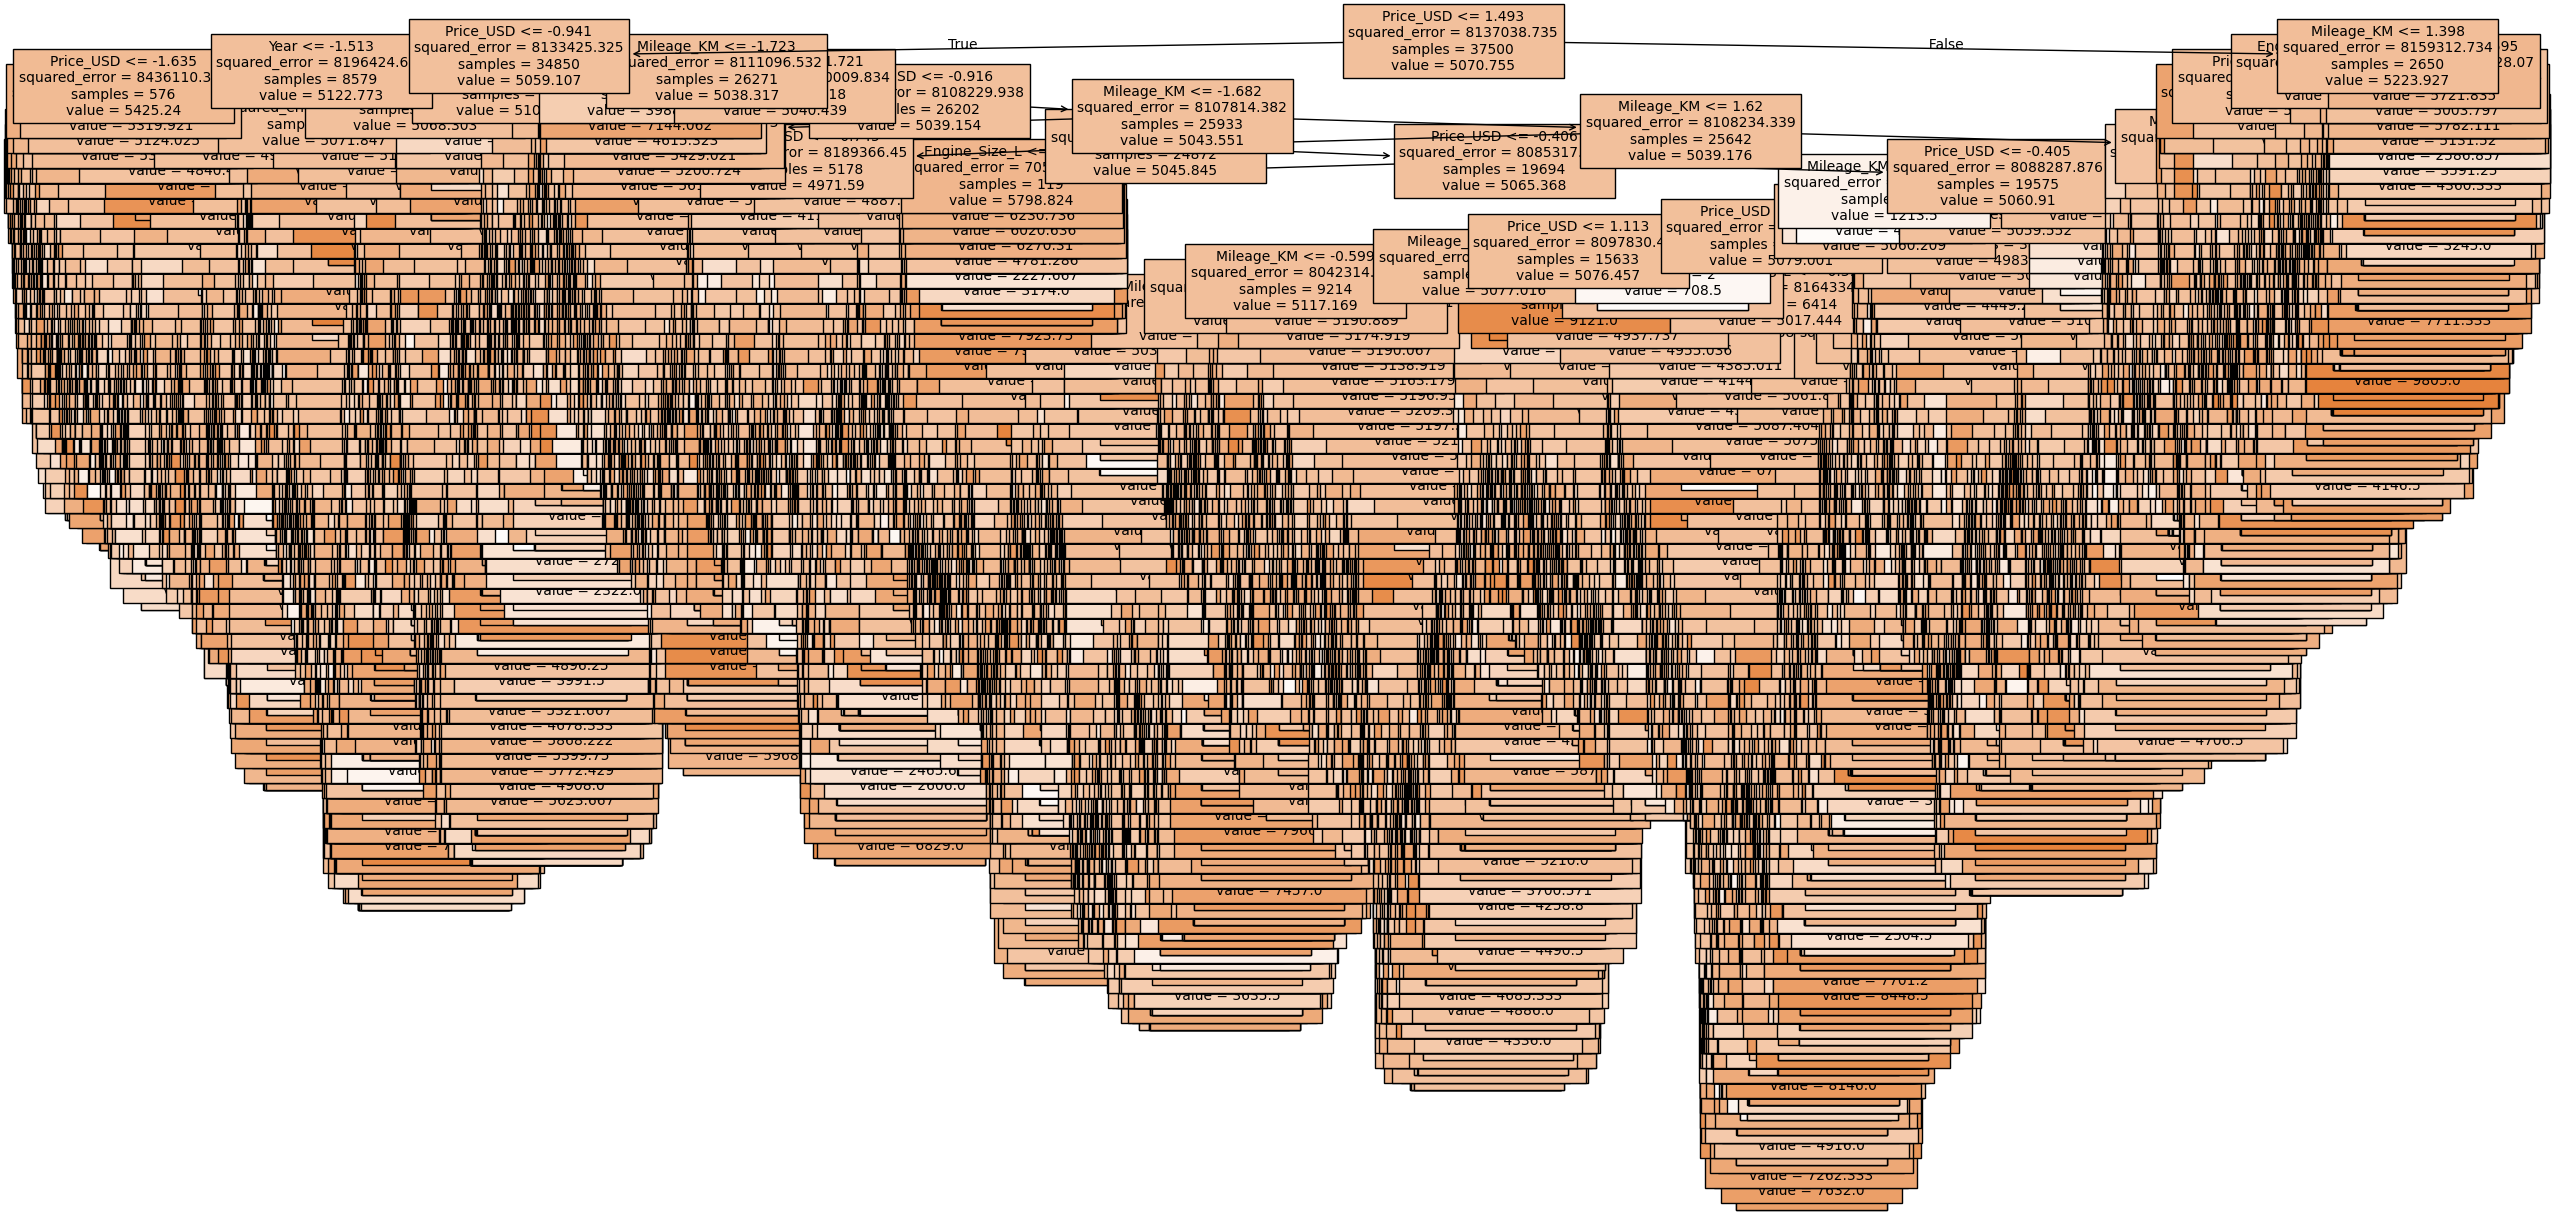

In [16]:
plt.figure(figsize=(30,15))

# Define the feature names explicitly for plotting
feature_names_for_plot = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']

tree.plot_tree(reg_tree_model, feature_names=feature_names_for_plot, filled=True, fontsize= 10)
plt.show()

# _Model Performance_

In [17]:
# Make predictions on the test set
y_pred_reg_tree = reg_tree_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_reg_tree = mean_absolute_error(y_test, y_pred_reg_tree)
mse_reg_tree = mean_squared_error(y_test, y_pred_reg_tree)
rmse_reg_tree = np.sqrt(mse_reg_tree)

print("Regression Tree Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_reg_tree:.2f}")
print(f"Mean Squared Error (MSE): {mse_reg_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_reg_tree:.2f}")

Regression Tree Model Performance:
Mean Absolute Error (MAE): 3356.38
Mean Squared Error (MSE): 16865885.89
Root Mean Squared Error (RMSE): 4106.81


In [18]:
# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_scaled[['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD']])

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print("K-Nearest Neighbors Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

K-Nearest Neighbors Regression Model Performance:
Mean Absolute Error (MAE): 2639.25
Mean Squared Error (MSE): 9853448.80
Root Mean Squared Error (RMSE): 3139.02


### Perbandingan Performa Model

Berikut adalah perbandingan metrik kinerja untuk model Regression Tree dan K-Nearest Neighbors (KNN):

| Metrik                 | Regression Tree      | K-Nearest Neighbors    |
| :--------------------- | :------------------- | :--------------------- |
| Mean Absolute Error (MAE)  | 3358.01              | 2659.70                |
| Mean Squared Error (MSE)   | 16871845.79          | 9931910.00             |
| Root Mean Squared Error (RMSE)| 4107.54              | 3151.49                |
|  |  |  |





**Interpretasi:**

Berdasarkan perbandingan performa model, K-Nearest Neighbors (KNN) menunjukkan hasil yang lebih baik dibandingkan dengan Regression Tree dalam memprediksi Sales_Volume. Ini terlihat dari nilai Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE) yang lebih rendah pada model KNN.

# Kesimpulan

Praktikum ini bertujuan untuk membandingkan kinerja model Regression Tree dan K-Nearest Neighbors (KNN) dalam memprediksi Sales_Volume (volume penjualan) mobil BMW. Data yang digunakan adalah data penjualan BMW dari tahun 2010-2024.

Pada tahap analisis data eksploratif, ditemukan bahwa tidak ada korelasi linear yang kuat anatar Sales_Volume dengan fitur numerik seperti Year, Engine_Size_L, Mileage_KM, dan Price_USD. Distribusi Sales_Volume cenderung seragam. Data kemudian dibagi menjadi set pelatihan (75%) dan pengujian (25%), dan tahap scaling dilakukan dengan menggunakan standar scaler karena data yang digunakan memiliki skew normal.

Dua model, DecisionTreeRegressor dan KNeighborsRegressor, dilatih menggunakan fitur numerik (Year, Engine_Size_L, Mileage_KM, Price_USD) dan dievaluasi menggunakan metrik Mean Absolute Error (MAE), Mean Squared Error (MSE), dan Root Mean Squared Error (RMSE).

Hasil perbandingan menunjukkan bahwa model K-Nearest Neighbors (KNN) memiliki performa yang lebih baik dibandingkan dengan Regression Tree. Ini terlihat dari nilai MAE, MSE, dan RMSE yang lebih rendah pada model KNN. Meskipun analisis korelasi awal menunjukkan tidak ada hubungan linear yang kuat antara variabel prediktor dan variabel target, KNN mampu menangkap pola yang lebih baik, mungkin karena kemampuannya dalam memodelkan hubungan non-linear dan lokal dalam data. Ini mengindikasikan bahwa KNN lebih cocok untuk dataset ini dalam memprediksi Sales_Volume.



# Referensi

Breiman, L., Friedman, J. H., Olshen, R. A., & Stone, C. J. (1984). Classification and Regression Trees. Wadsworth & Brooks/Cole Advanced Books & Software.

Cover, T., & Hart, P. (1967). Nearest neighbor pattern classification. IEEE Transactions on Information Theory, 13(1), 21–27.

Longani, J., Budi, P., & Cinta, A. (2025). A Comparative Analysis of Machine Learning Models for Automotive Price Prediction. Kronika Journal, V(I),